In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statsmodels.api as sm

from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
DATASET_LOC = os.path.join(os.environ['HOME'], 'repos/statistics/training/datasets')
datafiles = ['dataset_A.npy', 'dataset_B.npy']

exist = [os.path.exists(os.path.join(DATASET_LOC, f)) for f in datafiles]
if all(exist):
    print('All data files are present.')
else:
    print('Could not find these files:')
    _ = [print(os.path.join(DATASET_LOC, datafiles[i])) for i, e in enumerate(exist) if not e]

All data files are present.


In [16]:
npA = np.load(os.path.join(DATASET_LOC, datafiles[0]))
npB = np.load(os.path.join(DATASET_LOC, datafiles[1]))

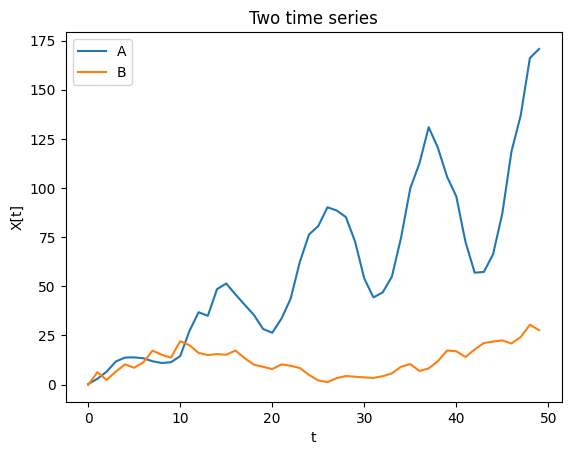

In [24]:
plt.plot(range(npA.shape[0]), npA, label='A')
plt.plot(range(npB.shape[0]), npB, label='B')
plt.xlabel('t')
plt.ylabel('X[t]')
plt.legend(loc='upper left')
_ = plt.title('Two time series')

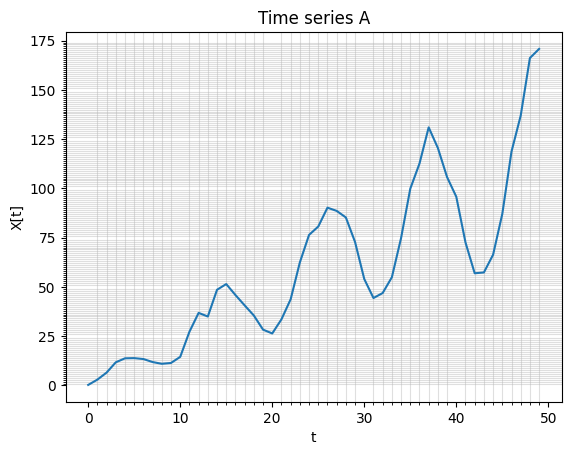

In [46]:
plt.plot(range(npA.shape[0]), npA)
plt.xlabel('t')
plt.ylabel('X[t]')
plt.xticks(np.arange(0, 50, 1), minor=True)
plt.yticks(np.arange(0, 175, 1), minor=True)
plt.grid(which='minor', alpha=0.4)
_ = plt.title('Time series A')

In [38]:
def plot_components(ts: np.ndarray, model: str, period: int) -> None:
    sd = seasonal_decompose(x=ts, model=model, period=period)
    Xs = [sd.observed, sd.seasonal, sd.trend, sd.resid]
    labels = ['Data', 'Seasonal component', 'Trend', 'Residual component']

    assert len(Xs) == len(labels)
    nplots = len(Xs)
    fig, ax = plt.subplots(nplots, 1, sharex=True, sharey = False)
    fig.set_figheight(15)
    fig.set_figwidth(15)

    for i in range(nplots):
        ax[i].plot(Xs[i], label=labels[i])
        ax[i].legend(loc='upper left')

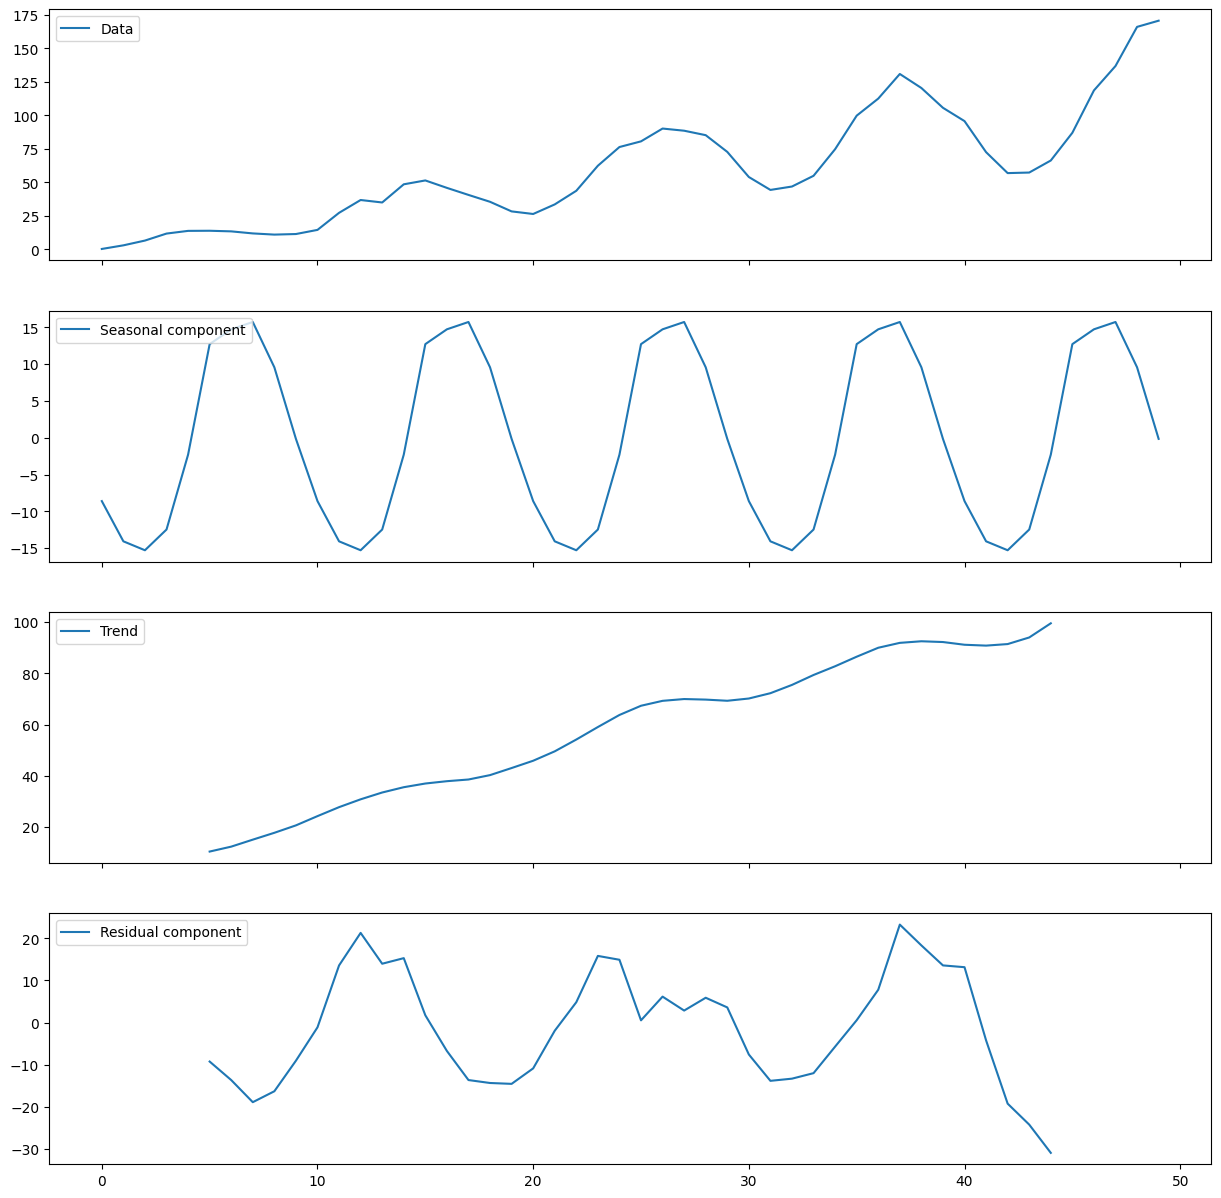

In [39]:
plot_components(npA, 'additive', 10)

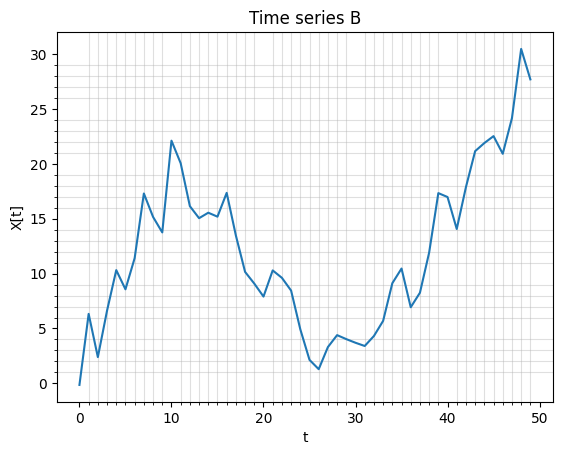

In [45]:
plt.plot(range(npB.shape[0]), npB)
plt.xlabel('t')
plt.ylabel('X[t]')
plt.xticks(np.arange(0, 50, 1), minor=True)
plt.yticks(np.arange(0, 30, 1), minor=True)
plt.grid(which='minor', alpha=0.4)
_ = plt.title('Time series B')

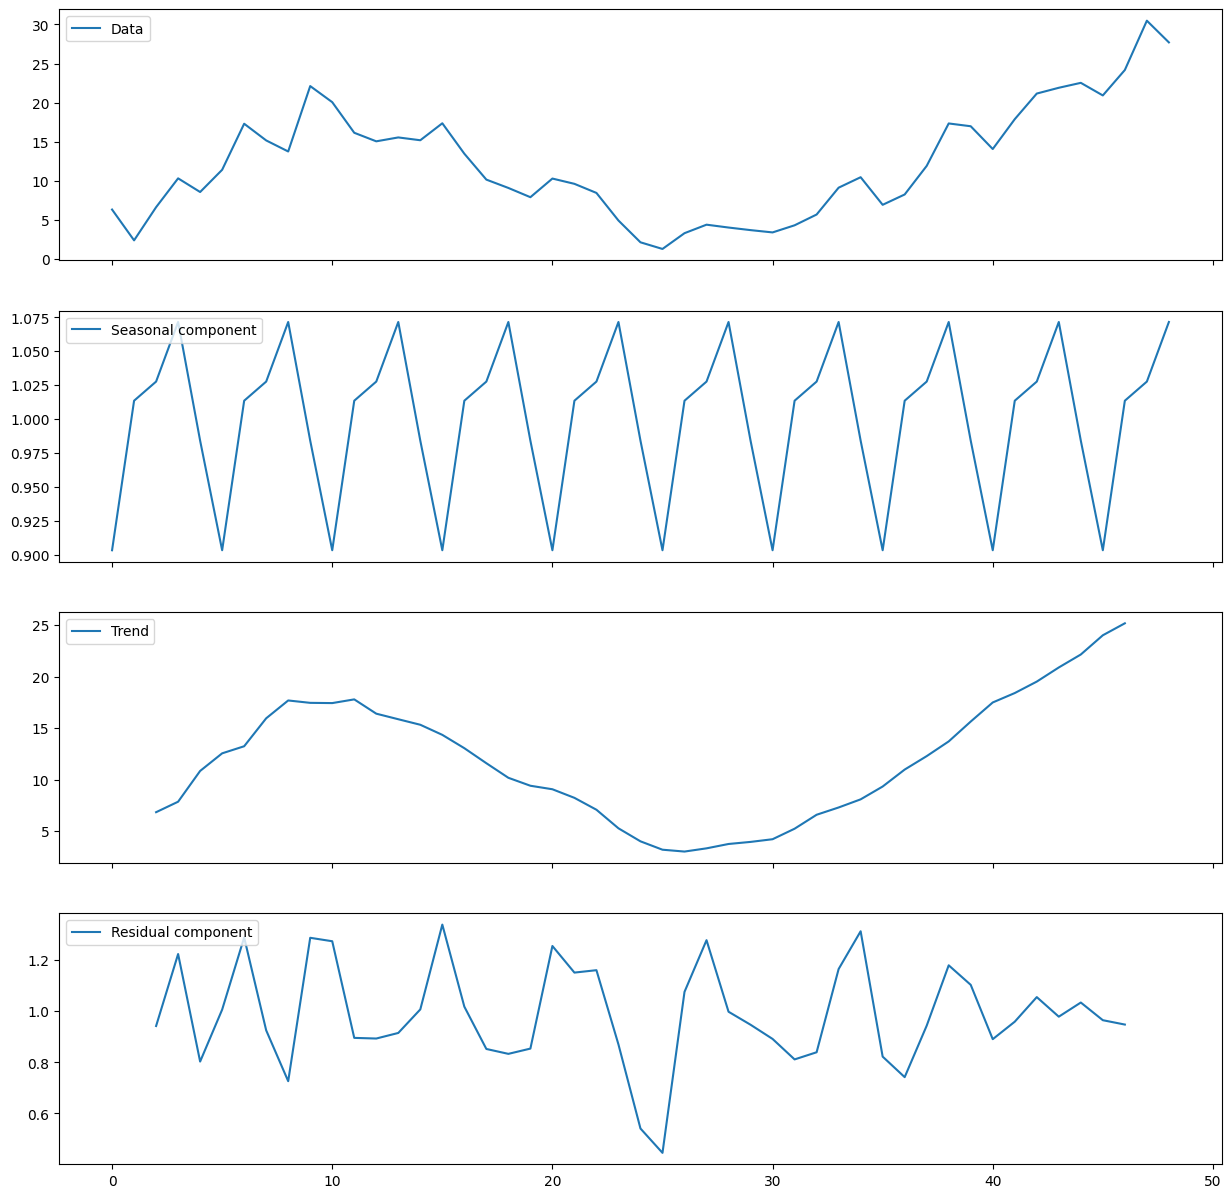

In [48]:
plot_components(npB[1:], 'multiplicative', 5)

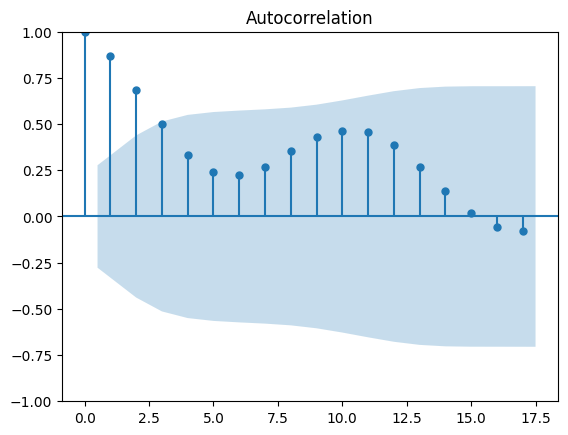

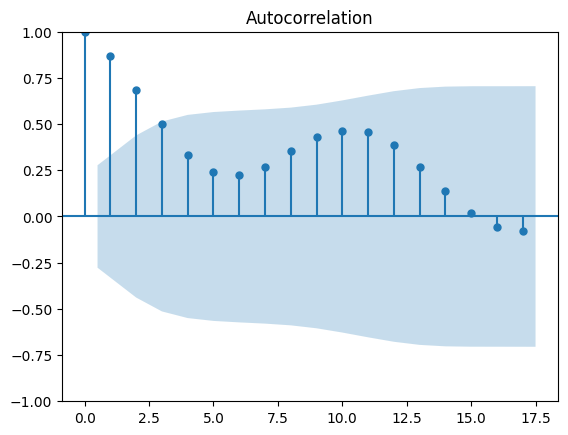

In [52]:
sm.graphics.tsa.plot_acf(npA)

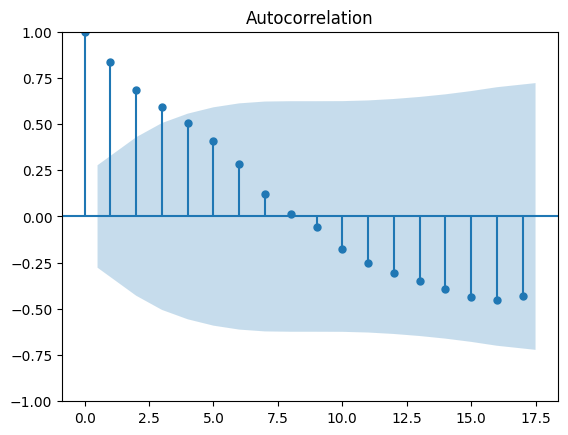

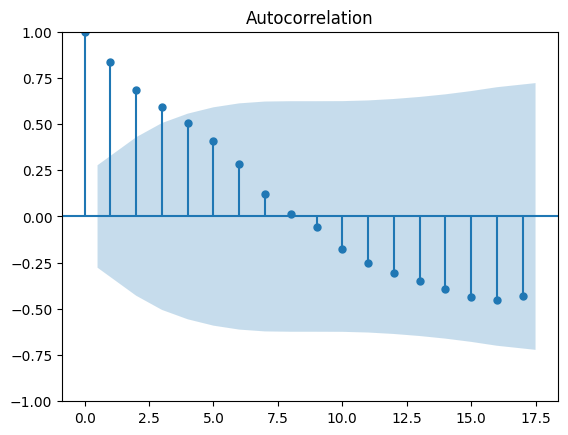

In [51]:
sm.graphics.tsa.plot_acf(npB)